In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from skimage.io import imread, imshow
import utils
from skimage import measure
import numpy as np
import os
import pickle
%matplotlib inline

In [3]:
annotations = utils.read_annotations("../data/validation_annotations.txt")

In [28]:
SCAN_ID = "ANON_LUNG_TC561"
SLICE_ID = "48"
annotation_example = annotations[SCAN_ID][SLICE_ID]
image_filename = utils.get_image_filename("../data/validation_raw/", annotation_example)
with open('../data/results/segmentation/lungs_1/' + SCAN_ID + '.' + SLICE_ID, 'rb') as f:
    prediction_lung = pickle.load(f)
with open('../data/results/segmentation/radiomics_vgg_16000_sample/'  + SCAN_ID + '.' + SLICE_ID, 'rb') as f:
    prediction_radiomics = pickle.load(f)

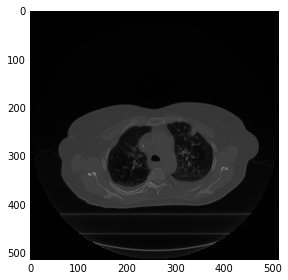

In [22]:
I = utils.read_image(image_filename)
imshow(I / 0.065)

/home/ubuntu/hms/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


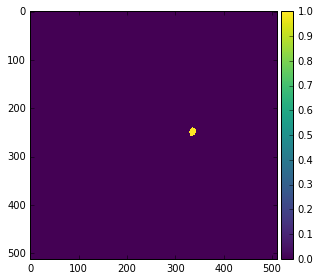

In [23]:
mask_image = utils.mask_contours(I, annotation_example['structures']['radiomics_gtv'], 1)
imshow(mask_image)

/home/ubuntu/hms/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


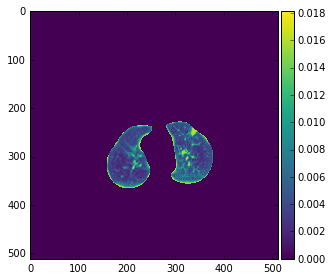

In [24]:
# lung
lung_mask = (prediction_lung == 1)
lung_image = lung_mask * I
imshow(lung_image)

{'radiomics_gtv': [[335, 241, 335, 241, 336, 241, 336, 241, 337, 242, 338, 242, 338, 242, 339, 242, 339, 242, 339, 242, 340, 243, 340, 243, 340, 243, 340, 244, 340, 244, 341, 244, 341, 244, 342, 244, 342, 244, 342, 245, 342, 245, 342, 246, 343, 246, 343, 247, 343, 247, 343, 248, 343, 248, 343, 249, 343, 249, 343, 249, 343, 249, 343, 249, 343, 250, 342, 250, 342, 250, 342, 251, 342, 251, 342, 251, 342, 252, 341, 252, 341, 252, 341, 253, 340, 253, 340, 253, 340, 253, 340, 254, 340, 254, 340, 254, 340, 255, 340, 255, 339, 256, 339, 256, 339, 256, 339, 256, 338, 257, 338, 257, 338, 257, 338, 258, 338, 258, 337, 258, 337, 258, 337, 258, 336, 259, 336, 259, 336, 259, 336, 260, 335, 260, 335, 260, 335, 260, 334, 260, 333, 260, 333, 260, 333, 260, 333, 259, 332, 259, 331, 259, 331, 259, 331, 258, 330, 258, 330, 257, 330, 254, 330, 253, 329, 253, 329, 253, 329, 253, 329, 252, 329, 252, 329, 251, 329, 251, 329, 251, 329, 251, 329, 250, 329, 250, 329, 250, 329, 249, 330, 249, 330, 249, 330, 248, 

/home/ubuntu/hms/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "
/home/ubuntu/hms/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


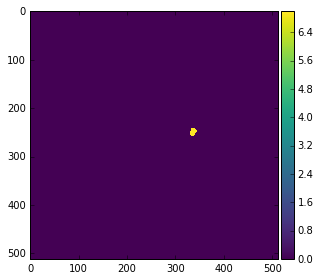

In [25]:
with open(os.path.join('../data/lung_validation_examples/{}/coordinates.txt').format(SCAN_ID), 'r') as f:
    r0, c0, r1, c1 = [int(x) for x in f.read().split(",")]

data = annotations[SCAN_ID][SLICE_ID]
radiomics = {k: v for k, v in data['structures'].items() if k == 'radiomics_gtv'}
print(radiomics)
mask = utils.create_mask((512, 512), radiomics)
imshow(mask)

/home/ubuntu/hms/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


0.00693886444867


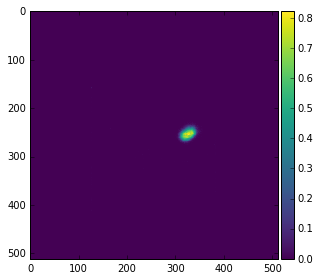

In [31]:
x = np.zeros((512,512), dtype=np.float)
x[r0:r1, c0:c1] = prediction_radiomics[1]
imshow(x)